## Import Libraries

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## Import dataset

In [34]:
data = pd.read_csv("https://raw.githubusercontent.com/laxmi-narayan-87/OIBSIP_DATA-SCIENCE/refs/heads/main/car%20data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data preprocessing

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
data.drop(columns = ["Car_Name"], inplace = True)

## EDA

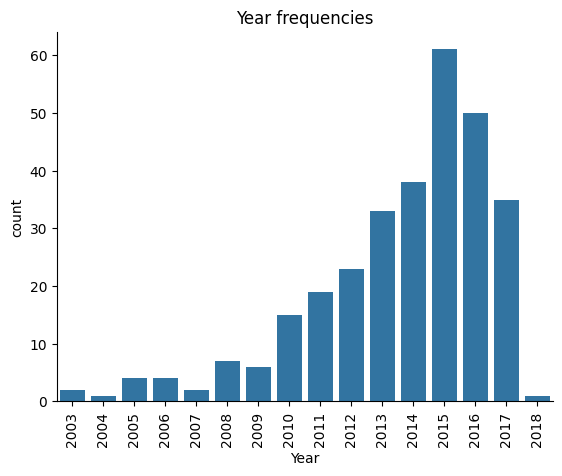

In [37]:
sns.countplot(x = "Year", data = data)
plt.xticks(rotation = 90)
sns.despine()
plt.title("Year frequencies");

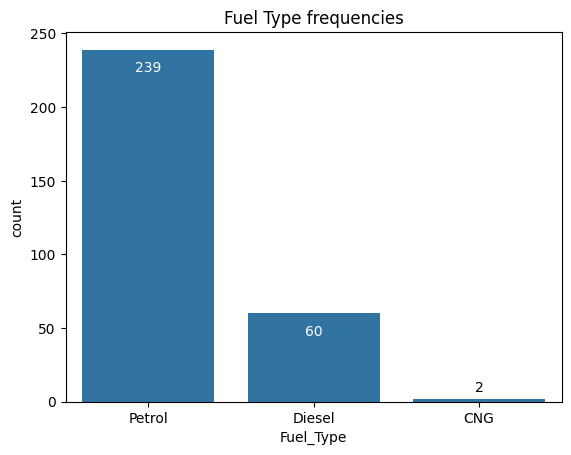

In [38]:
fuel_freq = data["Fuel_Type"].value_counts().reset_index()

sns.countplot(x = data["Fuel_Type"].map({
    "CNG": 2,
    "Diesel": 1,
    "Petrol": 0
}))
plt.xticks((2, 1, 0), ("CNG", "Diesel", "Petrol"));
for x, label, y in fuel_freq.itertuples():
    if y>50:
        plt.text(x, y - 15, y, ha = 'center', color = 'white')
    else:
        plt.text(x, y + 5, y, ha = 'center', color = 'black')

plt.title("Fuel Type frequencies");


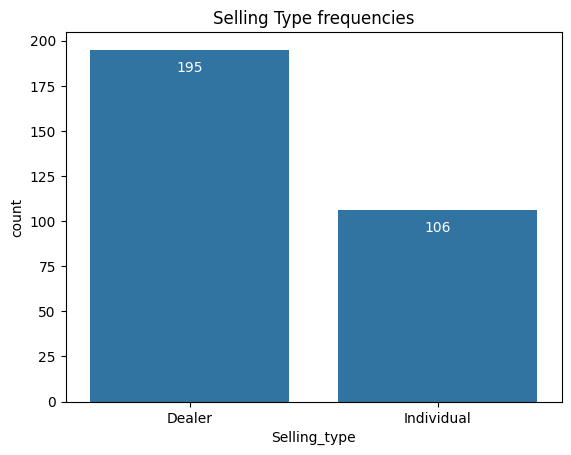

In [39]:
sell_type_freq = data["Selling_type"].value_counts().reset_index()

sns.countplot(x = data["Selling_type"].map({
    "Dealer": 0,
    "Individual": 1,
}))
plt.xticks((0, 1), ("Dealer", "Individual"))
for x, label, y in sell_type_freq.itertuples():
        plt.text(x, y - 12, y, ha = 'center', color = 'white')

plt.title("Selling Type frequencies");


In [40]:
data["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

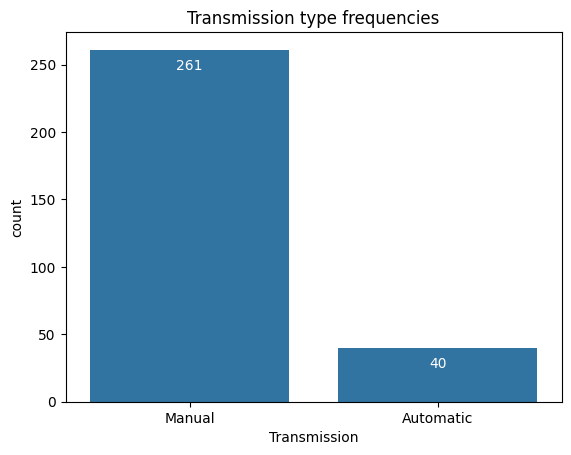

In [41]:
trans_type_freq = data["Transmission"].value_counts().reset_index()

sns.countplot(x = data["Transmission"].map({
    "Manual": 0,
    "Automatic": 1,
}))
plt.xticks((0, 1), ("Manual", "Automatic"))
for x, label, y in trans_type_freq.itertuples():
        plt.text(x, y - 15, y, ha = 'center', color = 'white')

plt.title("Transmission type frequencies");


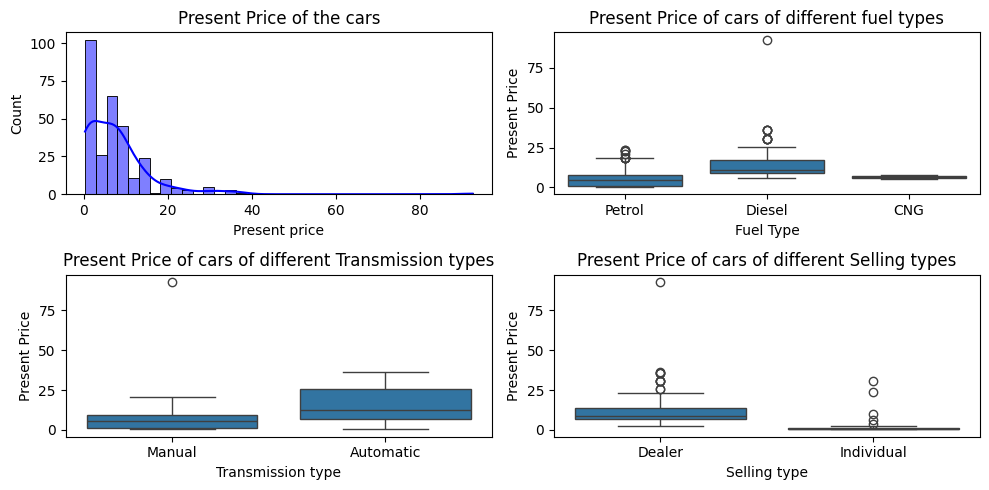

In [42]:
plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(x = "Present_Price", data = data, kde = True, color = 'b')
plt.xlabel("Present price")
plt.title("Present Price of the cars");

plt.subplot(2, 2, 2)
sns.boxplot(x = "Fuel_Type", data = data, y = "Present_Price")
plt.xlabel("Fuel Type")
plt.ylabel("Present Price")
plt.title("Present Price of cars of different fuel types");

plt.subplot(2, 2, 3)
sns.boxplot(x = "Transmission", data = data, y = "Present_Price")
plt.xlabel("Transmission type")
plt.ylabel("Present Price")
plt.title("Present Price of cars of different Transmission types");

plt.subplot(2, 2, 4)
sns.boxplot(x = "Selling_type", data = data, y = "Present_Price")
plt.xlabel("Selling type")
plt.ylabel("Present Price")
plt.title("Present Price of cars of different Selling types");
plt.tight_layout()

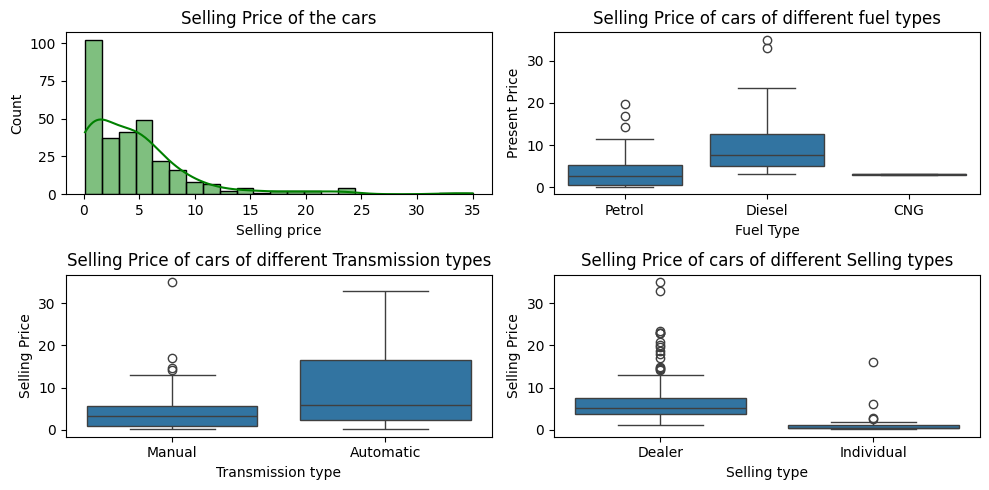

In [43]:
plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(x = "Selling_Price", data = data, kde = True, color = 'g')
plt.xlabel("Selling price")
plt.title("Selling Price of the cars");

plt.subplot(2, 2, 2)
sns.boxplot(x = "Fuel_Type", data = data, y = "Selling_Price")
plt.xlabel("Fuel Type")
plt.ylabel("Present Price")
plt.title("Selling Price of cars of different fuel types");

plt.subplot(2, 2, 3)
sns.boxplot(x = "Transmission", data = data, y = "Selling_Price")
plt.xlabel("Transmission type")
plt.ylabel("Selling Price")
plt.title("Selling Price of cars of different Transmission types");

plt.subplot(2, 2, 4)
sns.boxplot(x = "Selling_type", data = data, y = "Selling_Price")
plt.xlabel("Selling type")
plt.ylabel("Selling Price")
plt.title("Selling Price of cars of different Selling types");
plt.tight_layout()

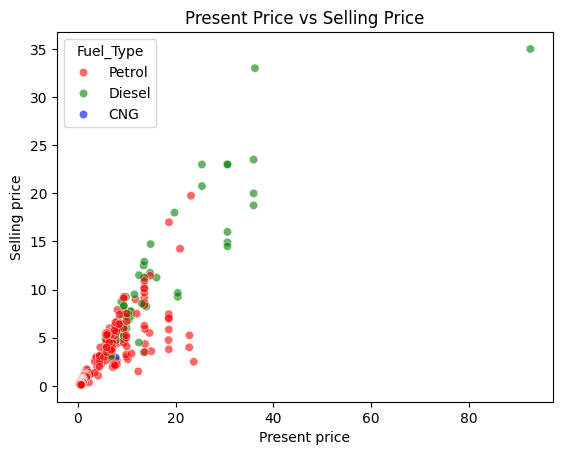

In [44]:
sns.scatterplot(y = "Selling_Price", x = "Present_Price", data = data, palette = ["r", "g", "b"], hue = 'Fuel_Type', alpha = 0.6)
plt.ylabel("Selling price")
plt.xlabel("Present price")
plt.title("Present Price vs Selling Price");

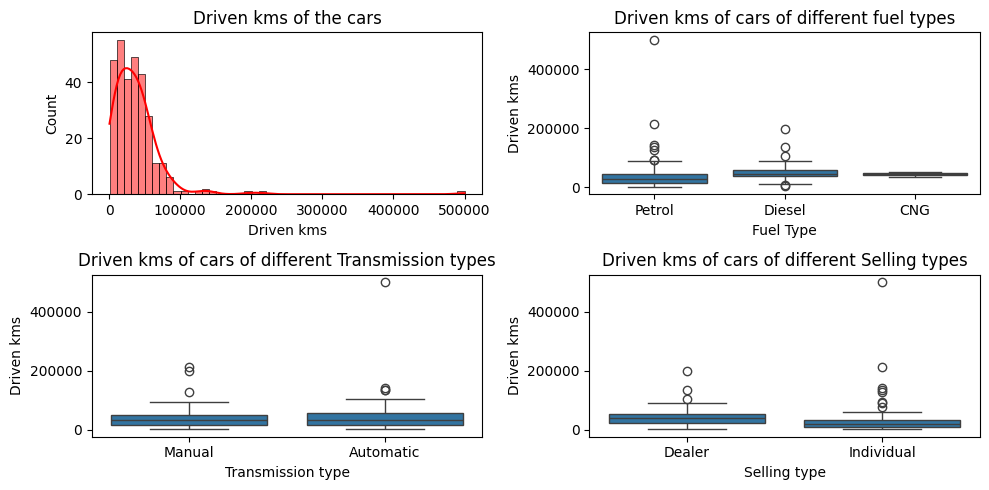

In [45]:
plt.figure(figsize = (10, 5))

plt.subplot(2, 2, 1)
sns.histplot(x = "Driven_kms", data = data, kde = True, color = 'r')
plt.xlabel("Driven kms")
plt.title("Driven kms of the cars");

plt.subplot(2, 2, 2)
sns.boxplot(x = "Fuel_Type", data = data, y = "Driven_kms")
plt.xlabel("Fuel Type")
plt.ylabel("Driven kms")
plt.title("Driven kms of cars of different fuel types");

plt.subplot(2, 2, 3)
sns.boxplot(x = "Transmission", data = data, y = "Driven_kms")
plt.xlabel("Transmission type")
plt.ylabel("Driven kms")
plt.title("Driven kms of cars of different Transmission types");

plt.subplot(2, 2, 4)
sns.boxplot(x = "Selling_type", data = data, y = "Driven_kms")
plt.xlabel("Selling type")
plt.ylabel("Driven kms")
plt.title("Driven kms of cars of different Selling types");
plt.tight_layout()

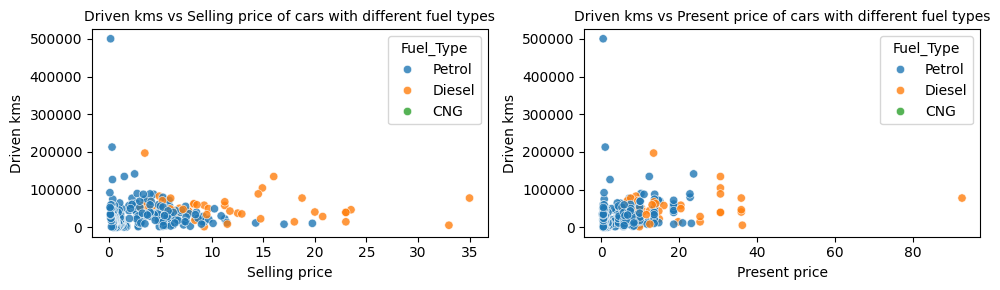

In [46]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
sns.scatterplot(y = "Driven_kms", x = "Selling_Price", data = data, hue = "Fuel_Type", alpha = 0.8)
plt.xlabel("Selling price")
plt.ylabel("Driven kms")
plt.title("Driven kms vs Selling price of cars with different fuel types", fontsize = 10)

plt.subplot(1, 2, 2)
sns.scatterplot(y = "Driven_kms", x = "Present_Price", data = data, hue = "Fuel_Type", alpha = 0.8)
plt.xlabel("Present price")
plt.ylabel("Driven kms")
plt.title("Driven kms vs Present price of cars with different fuel types", fontsize = 10)
plt.tight_layout()

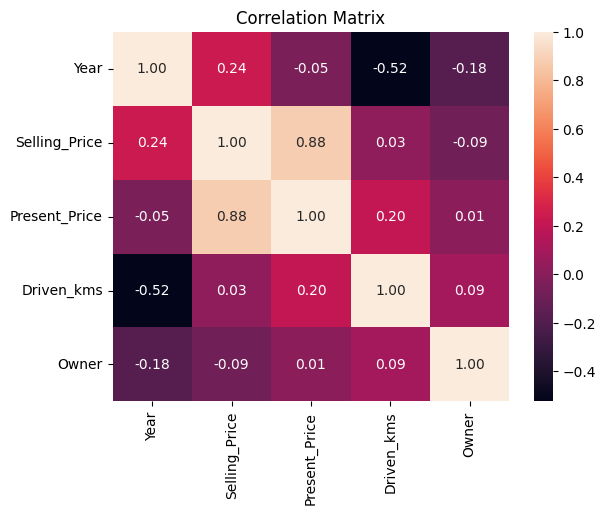

In [47]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt = '.2f')
plt.title("Correlation Matrix");

## Train test split

In [48]:
X = data.drop(columns = ["Selling_Price"]).values
y = data["Selling_Price"].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (240, 7)
y_train shape: (240,)
X_test shape: (61, 7)
y_test shape: (61,)


### One Hot Encoding the categorical variables

In [51]:
one_hot = OneHotEncoder(drop = 'first')
col_transformer = ColumnTransformer(transformers = [('one_hot_encoder', one_hot, [-4, -3, -2])], remainder = 'passthrough')

X_train = col_transformer.fit_transform(X_train)
X_test = col_transformer.transform(X_test)

## Modelling Experiments

### Custom function to evaluate model performances

In [52]:
def get_model_performance(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return{
        'r2_score': np.round(r2_score(y_test, y_pred), 2),
        'adjusted_r2_score': np.round((1 - (((1 - r2_score(y_test, y_pred)) * (X_test.shape[0] - 1))/(X_test.shape[0] - X_test.shape[1] - 1))), 2),
        'mae' : np.round(mean_absolute_error(y_test, y_pred), 2),
        'mse' : np.round(mean_squared_error(y_test, y_pred), 2),
        'rmse' : np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2),
        'mape' : np.round(mean_absolute_percentage_error(y_test, y_pred), 2),
    }

### Model1: Linear Regression

In [53]:
lin_reg = LinearRegression(n_jobs = -1)
get_model_performance(lin_reg)

{'r2_score': np.float64(0.86),
 'adjusted_r2_score': np.float64(0.84),
 'mae': np.float64(1.11),
 'mse': np.float64(3.0),
 'rmse': np.float64(1.73),
 'mape': np.float64(1.27)}

### Model2: KNearest neighbors regressor

#### Finding optimal k value

In [54]:
error_rate = []
for k in range(1, X_train.shape[0] + 1):
    knn = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(1 - r2_score(y_test, predictions))

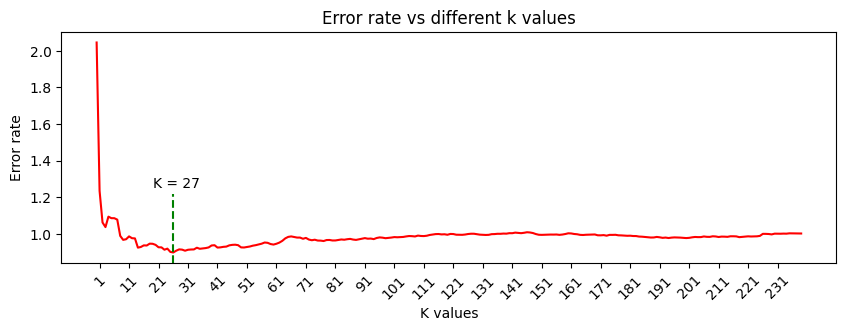

In [55]:
plt.figure(figsize = (10, 3))
sns.lineplot(error_rate, color = 'red')
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.xticks(np.arange(1, X_train.shape[0], 10), rotation = 45)
plt.title("Error rate vs different k values");
plt.axvline(x = np.argmin(error_rate), color = 'g', linestyle = '--', ymin = 0, ymax = 0.3)
plt.text(x = np.argmin(error_rate) - 7, y = 1.25, s = f"K = {np.argmin(error_rate) + 1}");    #+1 because index starts from 0

- Fitting the model with optimal k value (`27`)

In [56]:
knn = KNeighborsRegressor(n_neighbors = 27)
get_model_performance(knn)

{'r2_score': np.float64(0.1),
 'adjusted_r2_score': np.float64(-0.04),
 'mae': np.float64(3.13),
 'mse': np.float64(19.47),
 'rmse': np.float64(4.41),
 'mape': np.float64(4.04)}

- The reason behind the bad performance is the data is not in the same scale, so we need feature scaling for any distance based algorthms.
- Lets apply `min-max` scaling

- Lets follow the same steps
   - Find optimal k value
   - Fit the model with the optimal k value
   - Get model performance

In [57]:
scaler= MinMaxScaler()
X_train[:, [-2, -3, -4]] = scaler.fit_transform(X_train[:, [-2, -3, -4]])
X_test[:, [-2, -3, -4]] = scaler.transform(X_test[:, [-2, -3, -4]])

In [58]:
error_rate = []
for k in range(1, X_train.shape[0] + 1):
    knn = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(1 - r2_score(y_test, predictions))

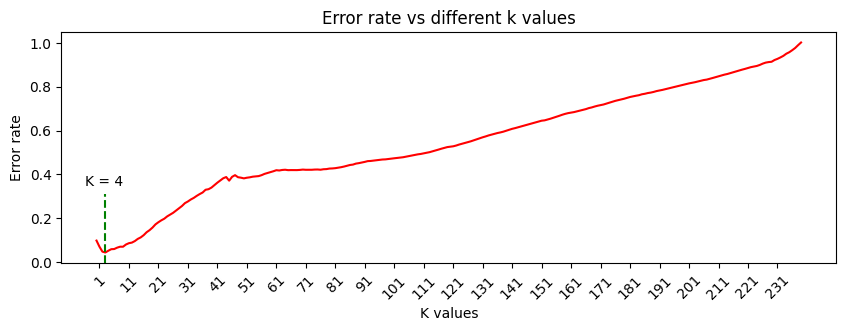

In [59]:
plt.figure(figsize = (10, 3))
sns.lineplot(error_rate, color = 'red')
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.xticks(np.arange(1, X_train.shape[0], 10), rotation = 45)
plt.title("Error rate vs different k values");
plt.axvline(x = np.argmin(error_rate), color = 'g', linestyle = '--', ymin = 0, ymax = 0.3)
plt.text(x = np.argmin(error_rate) - 7, y = 0.35, s = f"K = {np.argmin(error_rate) + 1}");    #+1 because index starts from 0

In [60]:
knn = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)
get_model_performance(knn)

{'r2_score': np.float64(0.96),
 'adjusted_r2_score': np.float64(0.95),
 'mae': np.float64(0.62),
 'mse': np.float64(0.95),
 'rmse': np.float64(0.98),
 'mape': np.float64(0.4)}

- Look at that, how much the model performance got increased !

### Model3: Decision tree regressor

In [61]:
dtree = DecisionTreeRegressor(random_state=1)
get_model_performance(dtree)

{'r2_score': np.float64(0.96),
 'adjusted_r2_score': np.float64(0.95),
 'mae': np.float64(0.6),
 'mse': np.float64(0.91),
 'rmse': np.float64(0.96),
 'mape': np.float64(0.17)}

### Model4: Random Forest regressor

In [62]:
rdf = RandomForestRegressor(random_state=42)
get_model_performance(rdf)

{'r2_score': np.float64(0.91),
 'adjusted_r2_score': np.float64(0.89),
 'mae': np.float64(0.68),
 'mse': np.float64(2.01),
 'rmse': np.float64(1.42),
 'mape': np.float64(0.21)}

### Model5: XGBoost

In [63]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
get_model_performance(xgb_model)

{'r2_score': np.float64(0.93),
 'adjusted_r2_score': np.float64(0.92),
 'mae': np.float64(0.61),
 'mse': np.float64(1.41),
 'rmse': np.float64(1.19),
 'mape': np.float64(0.2)}

##